In [1]:
dta <-read.csv("loan_data.csv",na.strings = c(""," ",NA))


In [2]:
#install.packages("mlr")
library(mlr)
summarizeColumns(dta)

Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


name,type,na,mean,disp,median,mad,min,max,nlevs
Loan_ID,factor,0,NA,0.9989806,NA,NA,1,1,981
Gender,factor,24,NA,NA,NA,NA,182,775,2
Married,factor,3,NA,NA,NA,NA,347,631,2
Dependents,factor,25,NA,NA,NA,NA,91,545,4
Education,factor,0,NA,0.2222222,NA,NA,218,763,2
Self_Employed,factor,55,NA,NA,NA,NA,119,807,2
ApplicantIncome,integer,0,5179.7951070,5695.1045325,3800,1779.120,0,81000,0
CoapplicantIncome,numeric,0,1601.9163303,2718.7728063,1110,1645.686,0,41667,0
LoanAmount,integer,27,142.5115304,77.4217431,126,44.478,9,700,0
Loan_Amount_Term,integer,20,342.2018730,65.1006019,360,0.000,6,480,0


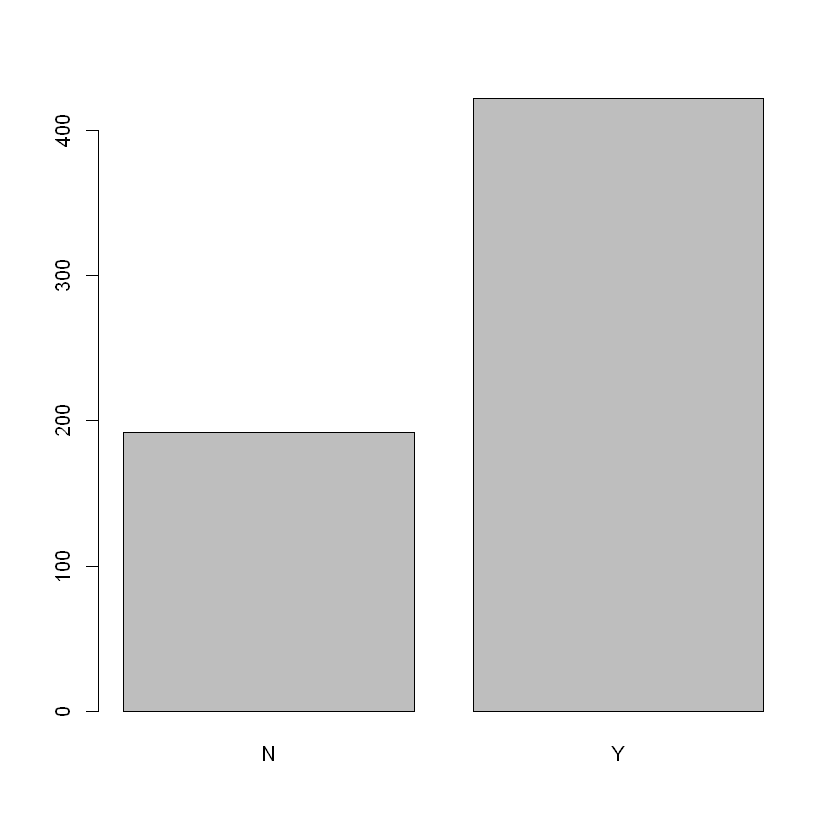

In [3]:
barplot(table(dta$Loan_Status))

In [4]:
prop.table(table(dta$Loan_Status))


        N         Y 
0.3127036 0.6872964 

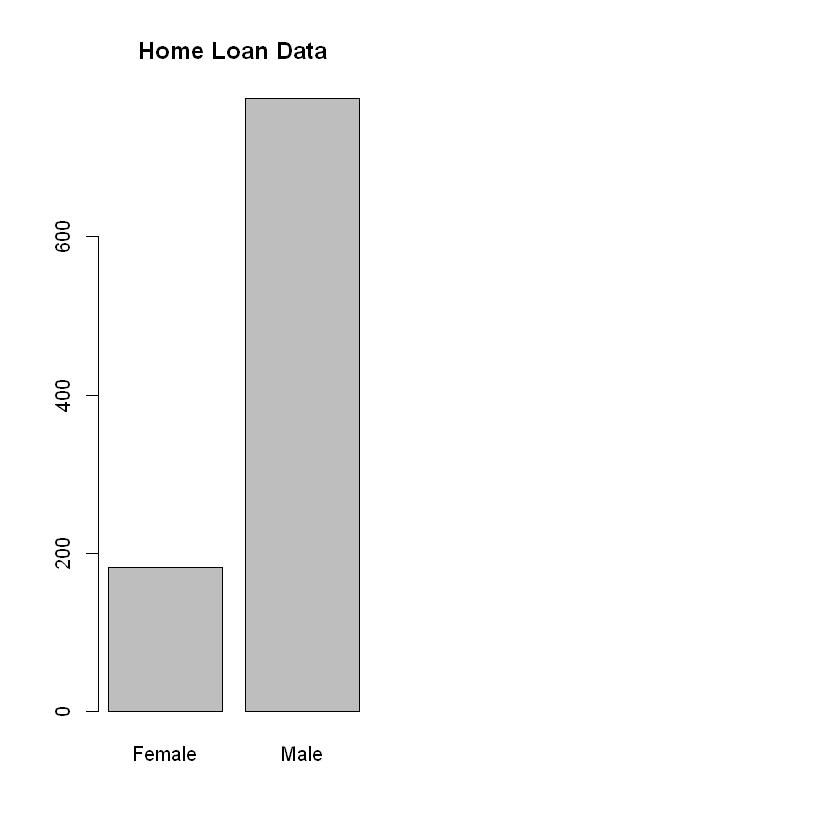

In [5]:
par(mfrow=c(1,2))
barplot(table(dta$Gender),main="Home Loan Data")


In [6]:
prop.table(table(dta$Gender))


   Female      Male 
0.1901776 0.8098224 

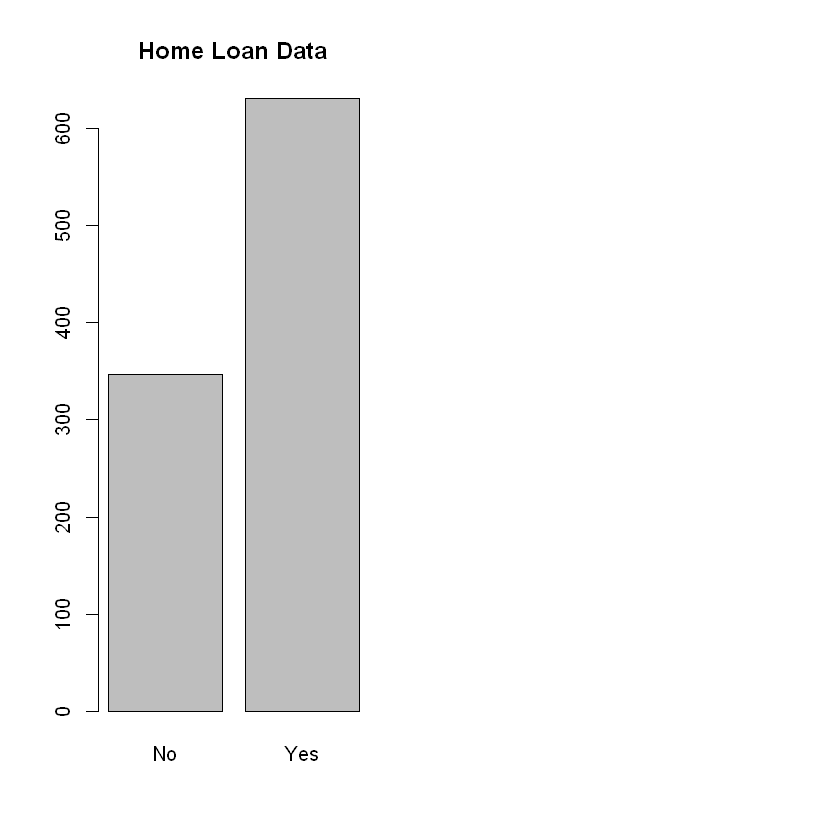

In [8]:
par(mfrow=c(1,2))
barplot(table(dta$Married),main="Home Loan Data")


In [9]:
prop.table(table(dta$Married))


       No       Yes 
0.3548057 0.6451943 

In [10]:
par(mfrow=c(1,2))
levels(dta$Dependents)

[1] "0"  "1"  "2"  "3+"

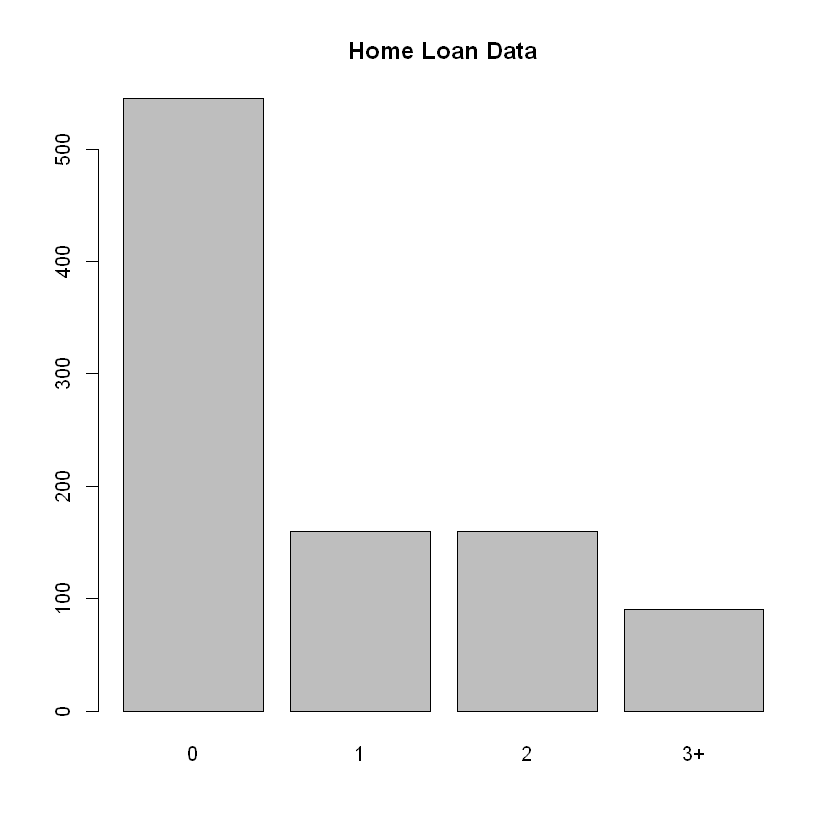

In [11]:
barplot(table(dta$Dependents),main="Home Loan Data")


In [12]:
par(mfrow=c(1,2))
levels(dta$Education)

[1] "Graduate"     "Not Graduate"

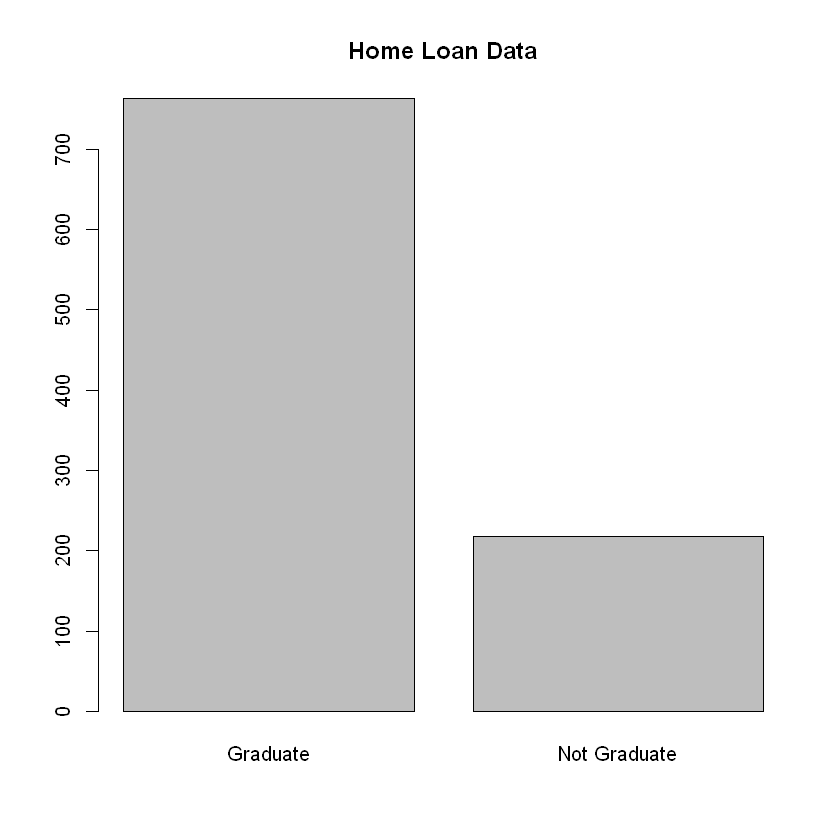

In [13]:
barplot(table(dta$Education),main="Home Loan Data")


In [14]:
par(mfrow=c(1,2))
levels(dta$Self_Employed)

[1] "No"  "Yes"

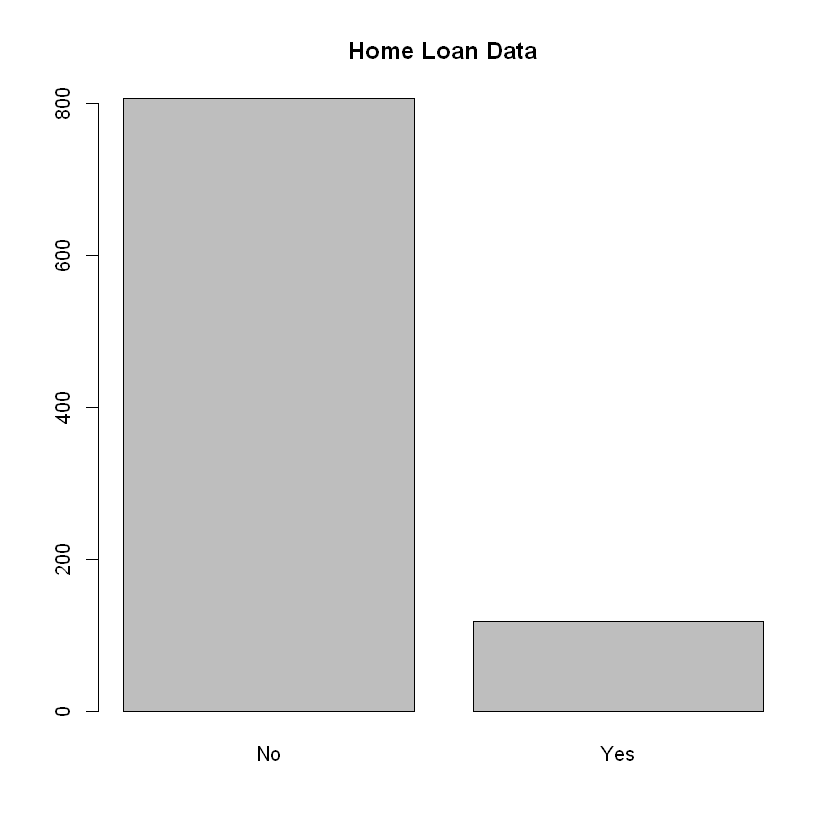

In [15]:
barplot(table(dta$Self_Employed),main="Home Loan Data")


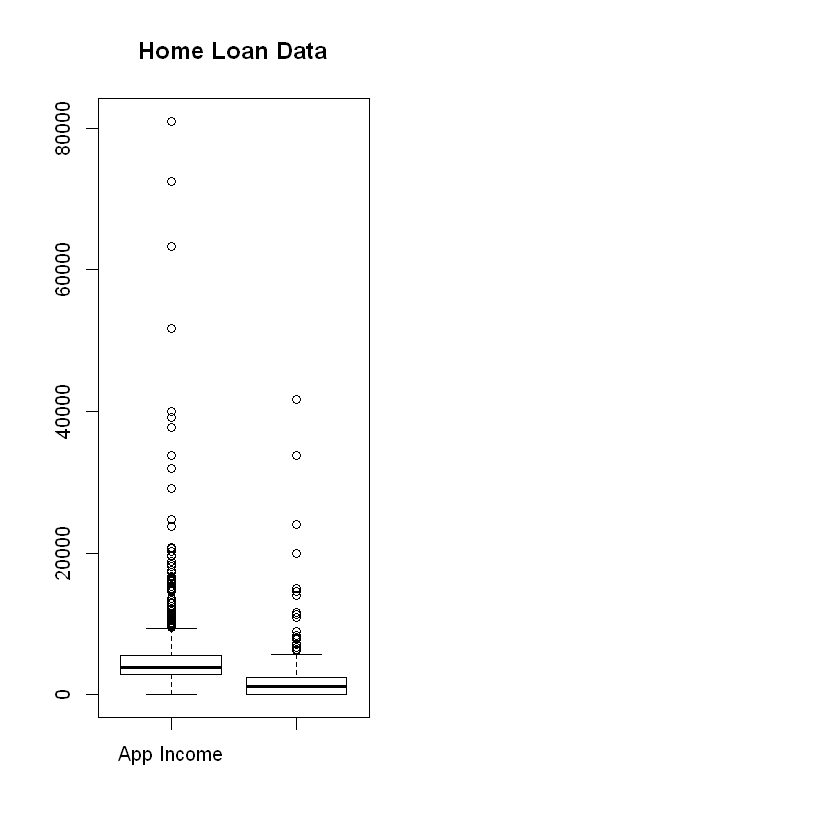

In [16]:
par(mfrow=c(1,2))
boxplot(dta$ApplicantIncome,dta$CoapplicantIncome,names=c("App Income","Coapp Income"),main="Home Loan Data")


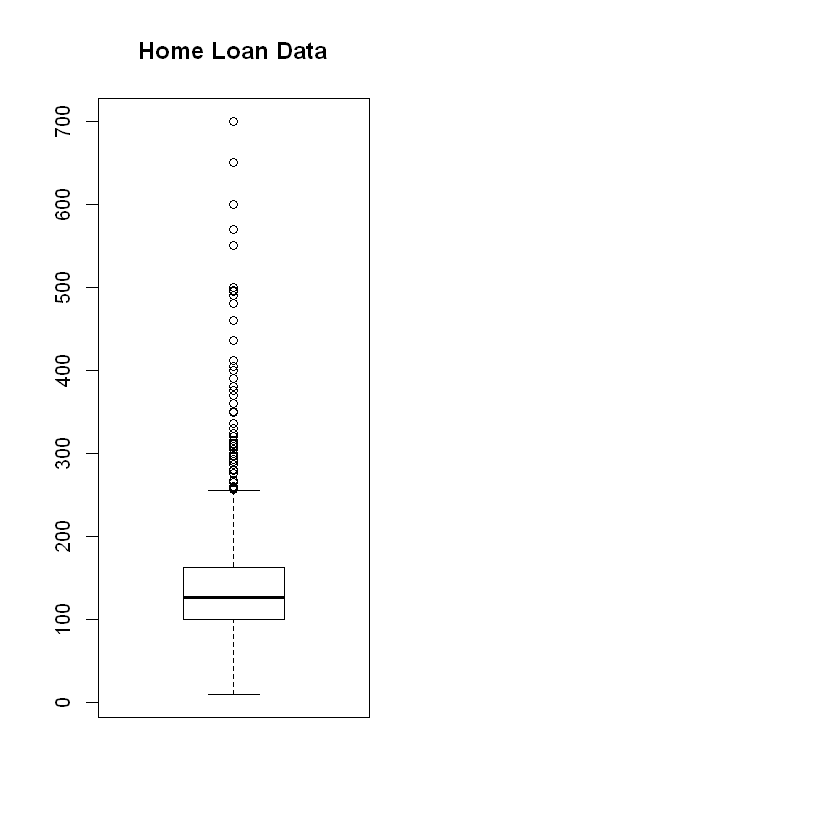

In [17]:
par(mfrow=c(1,2))
boxplot(dta$LoanAmount,main="Home Loan Data")


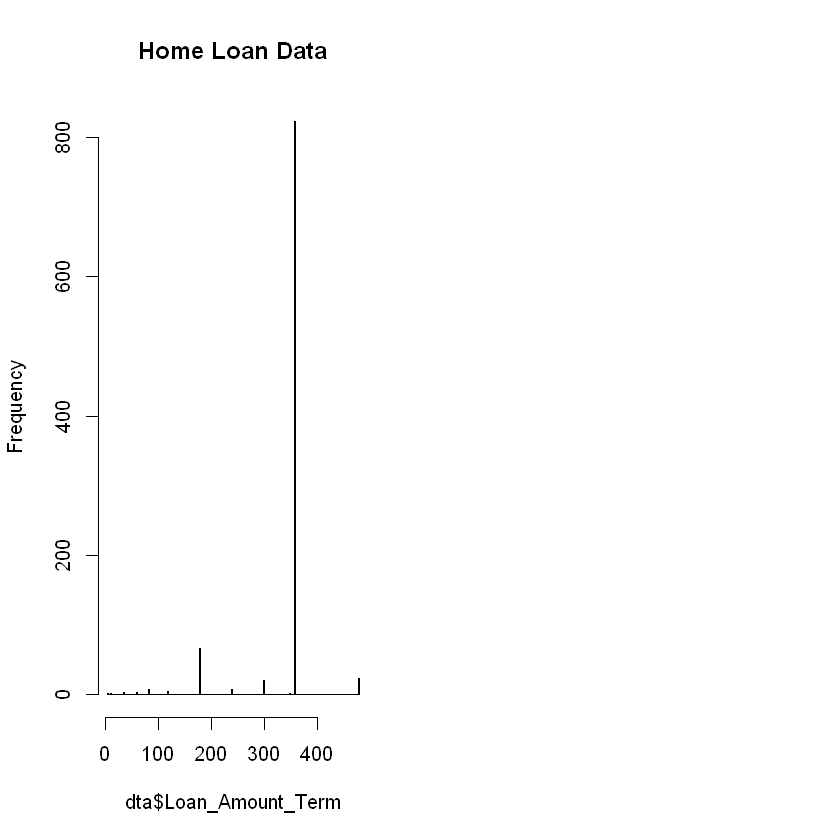

In [18]:
par(mfrow=c(1,2))
hist(dta$Loan_Amount_Term,breaks=500,main="Home Loan Data")


In [19]:
summary(dta$Loan_Amount_Term)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    6.0   360.0   360.0   342.2   360.0   480.0      20 

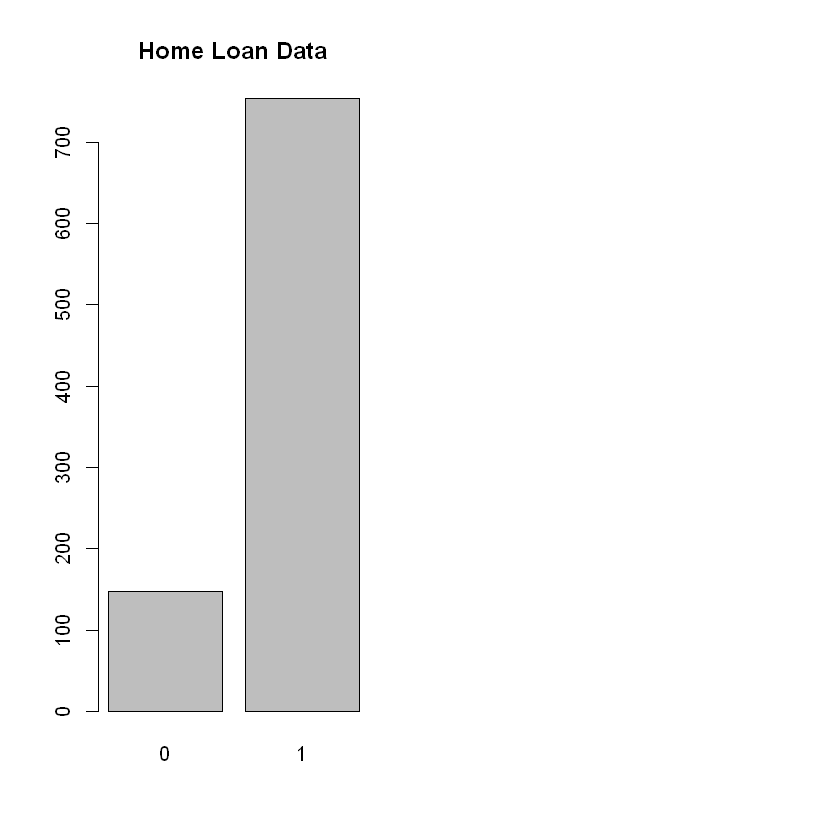

In [20]:
par(mfrow=c(1,2))
dta$Credit_History <-as.factor(dta$Credit_History)
barplot(table(dta$Credit_History),main="Home Loan Data")


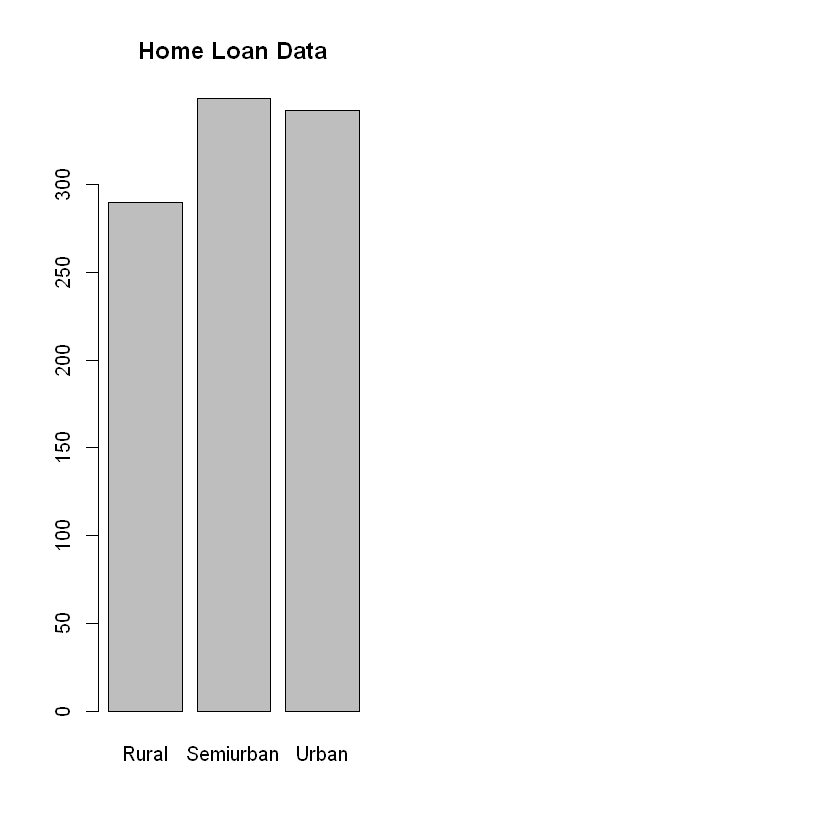

In [21]:
par(mfrow=c(1,2))
barplot(table(dta$Property_Area),main="Home Loan Data")


In [22]:
#install.packages("ggplot2")
library(ggplot2)

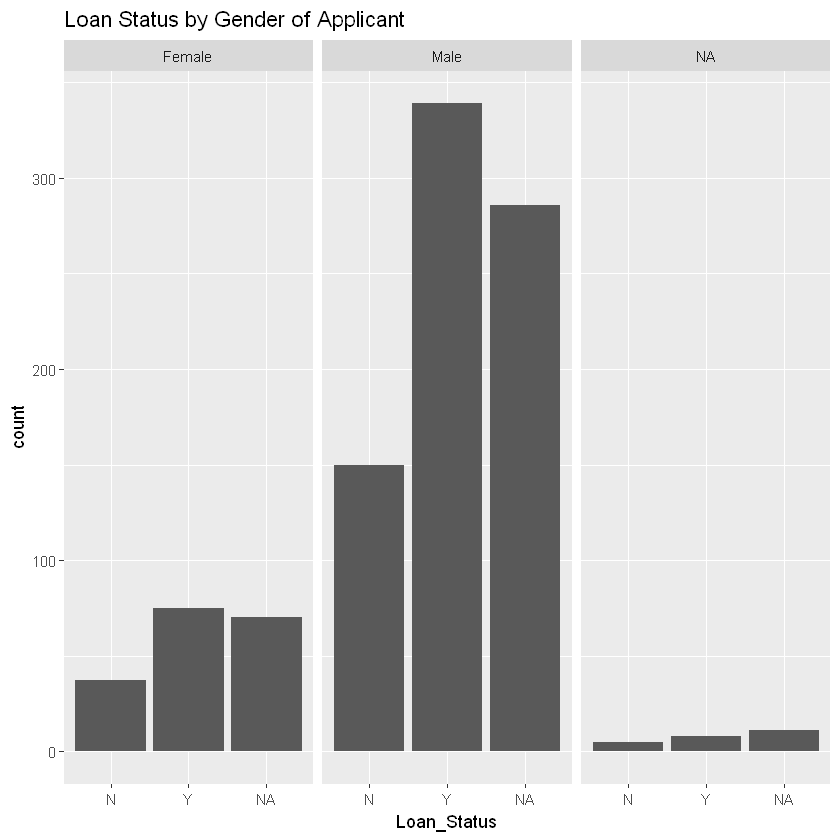

In [23]:
print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Gender)+ggtitle("Loan Status by Gender of Applicant"))

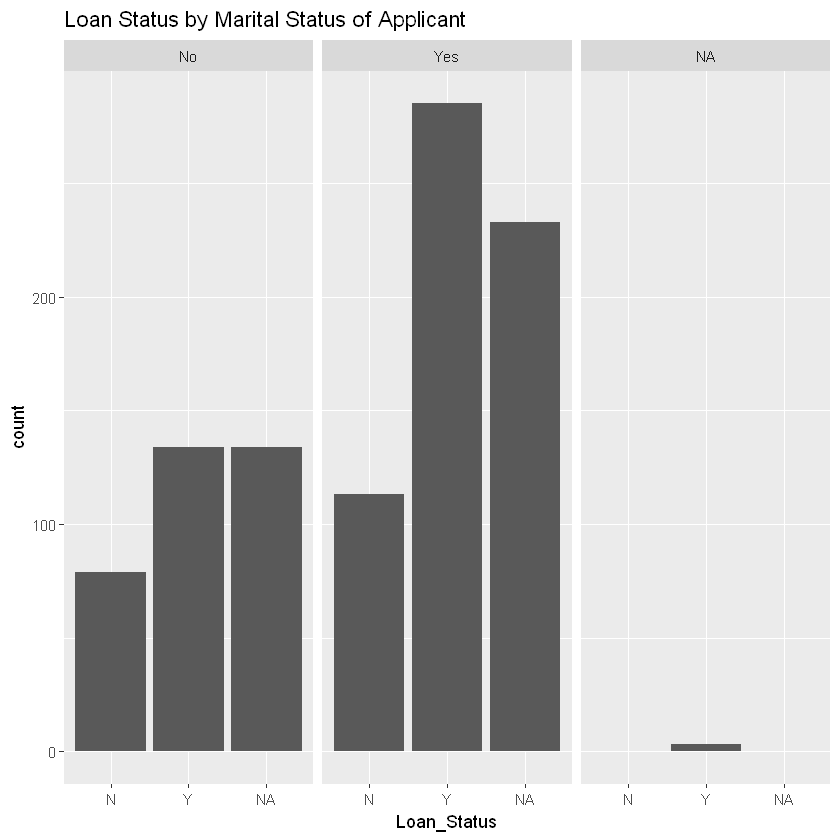

In [24]:
print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Married)+ggtitle("Loan Status by Marital Status of Applicant"))

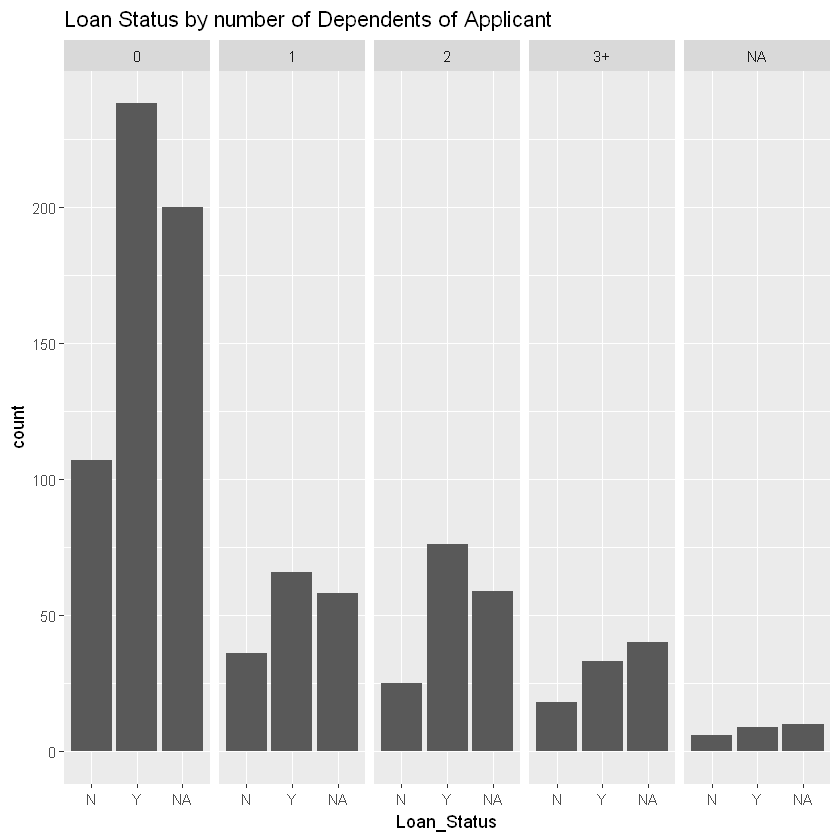

In [25]:
#a larger proportion of not married applicants are refused than married ones
print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Dependents)+ggtitle("Loan Status by number of Dependents of Applicant"))

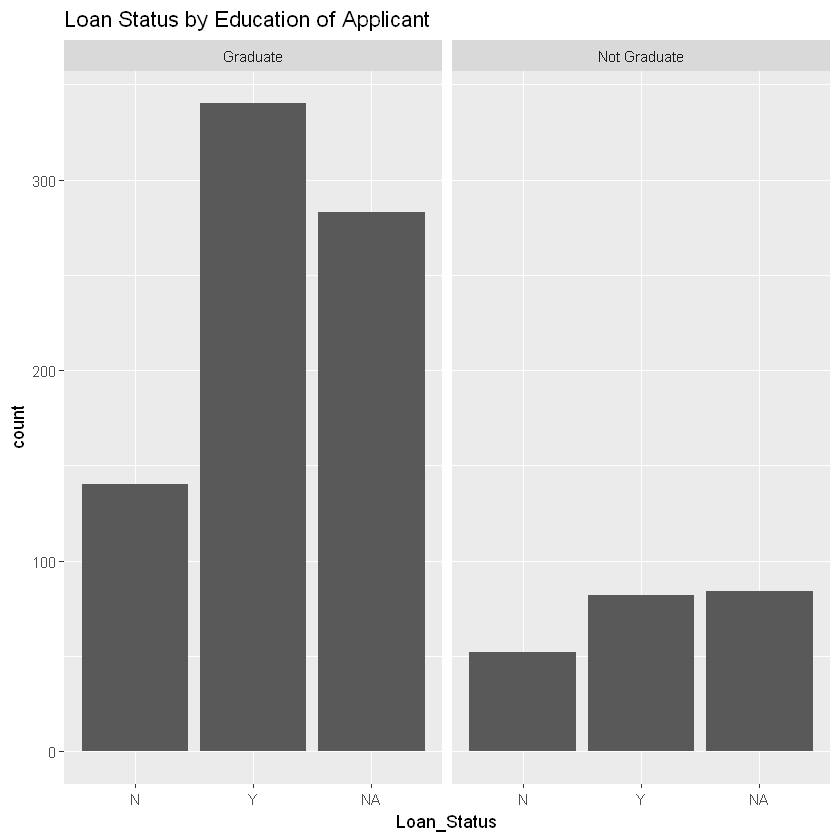

In [26]:

print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Education)+ggtitle("Loan Status by Education of Applicant"))

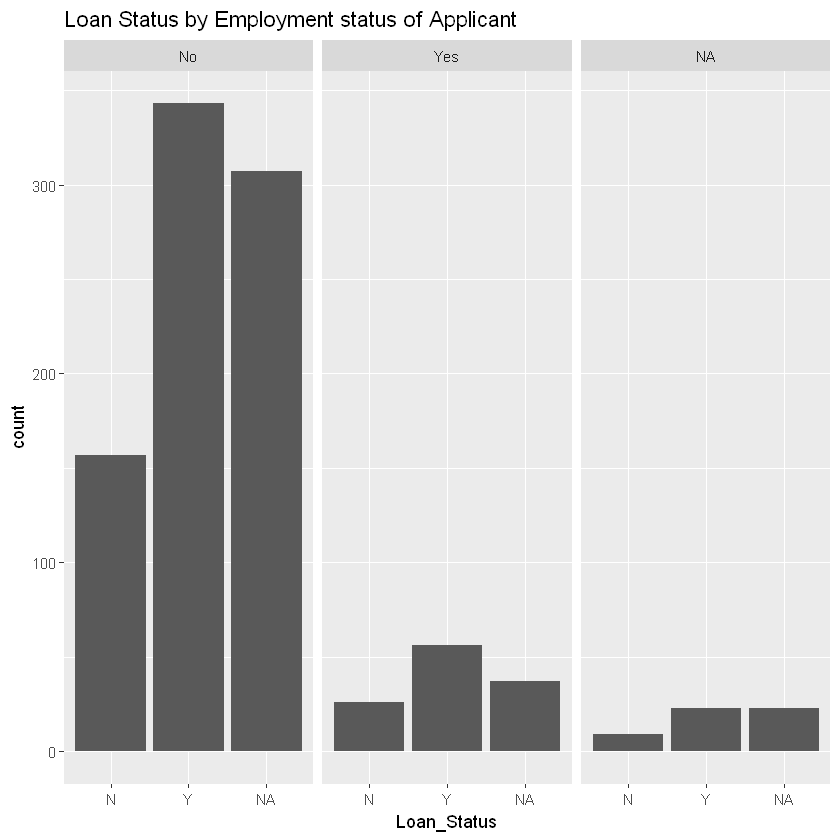

In [27]:
#a larger proportion on non graduates are refused than graduates
print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Self_Employed)+ggtitle("Loan Status by Employment status of Applicant"))

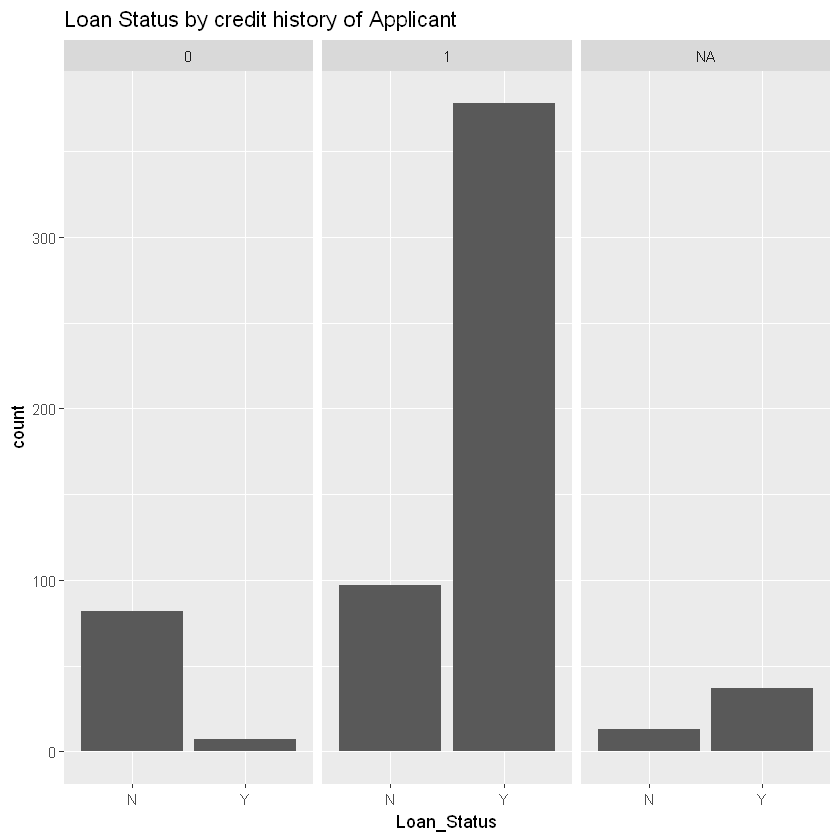

In [35]:
#difficult to see any patterns, most of the loans are for 360 months
print(ggplot(train, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Credit_History)+ggtitle("Loan Status by credit history of Applicant"))

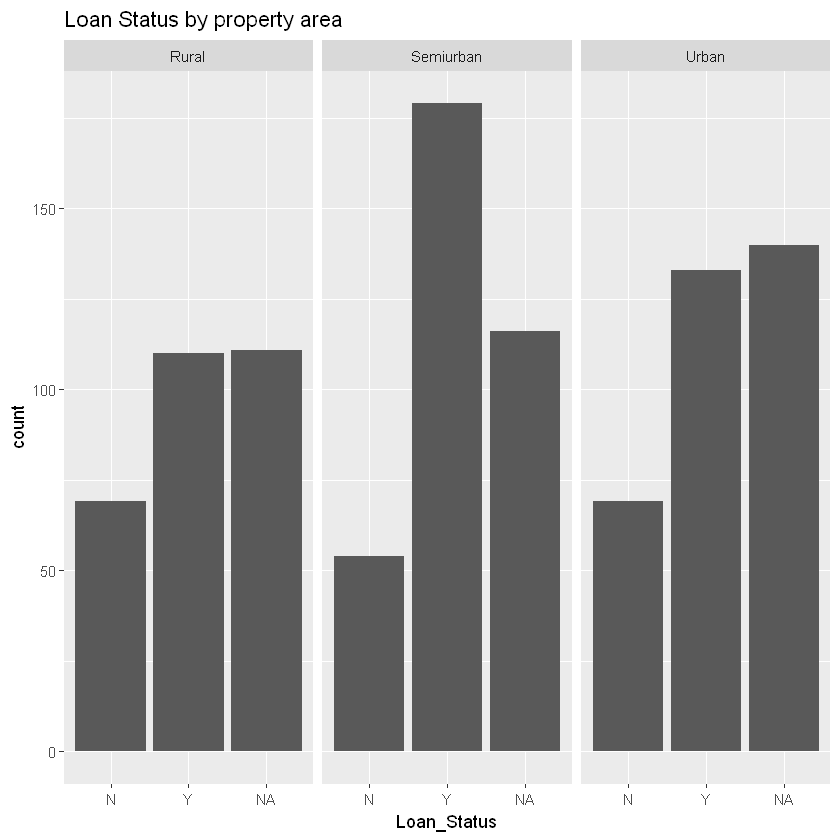

In [28]:
#this looks very important! Almost all applicants with history=0 are refused
print(ggplot(dta, aes(x=Loan_Status))+geom_bar()+facet_grid(.~Property_Area)+ggtitle("Loan Status by property area"))

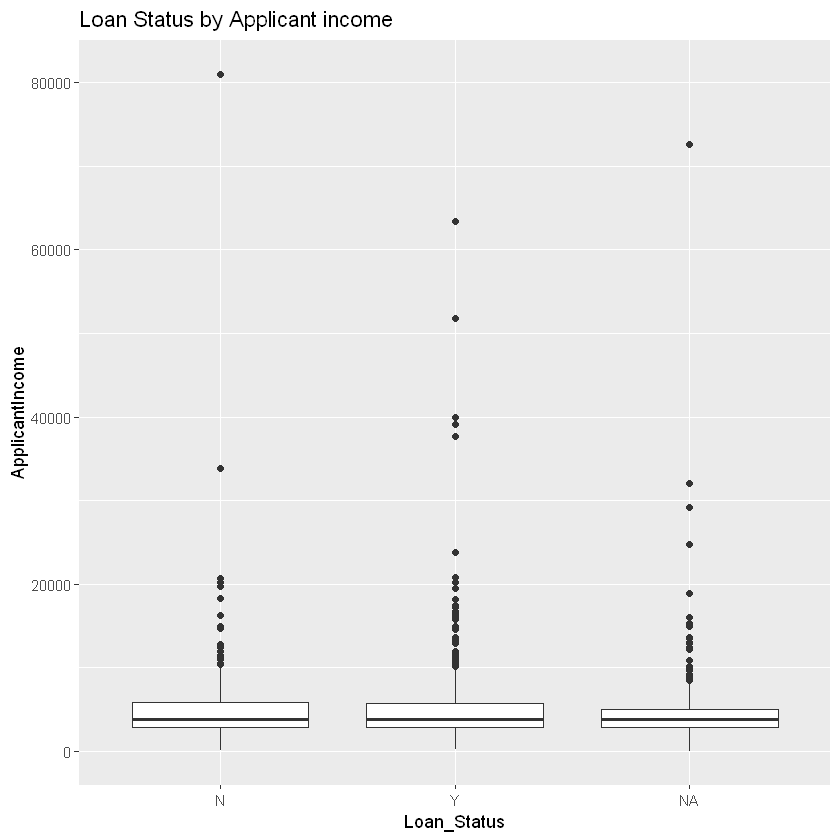

In [29]:
#it's easiest to get a loan if the property is semi urban and hardest if it is rural
print(ggplot(dta, aes(x=Loan_Status,y=ApplicantIncome))+geom_boxplot()+ggtitle("Loan Status by Applicant income"))


Warning message:
"Removed 27 rows containing non-finite values (stat_boxplot)."

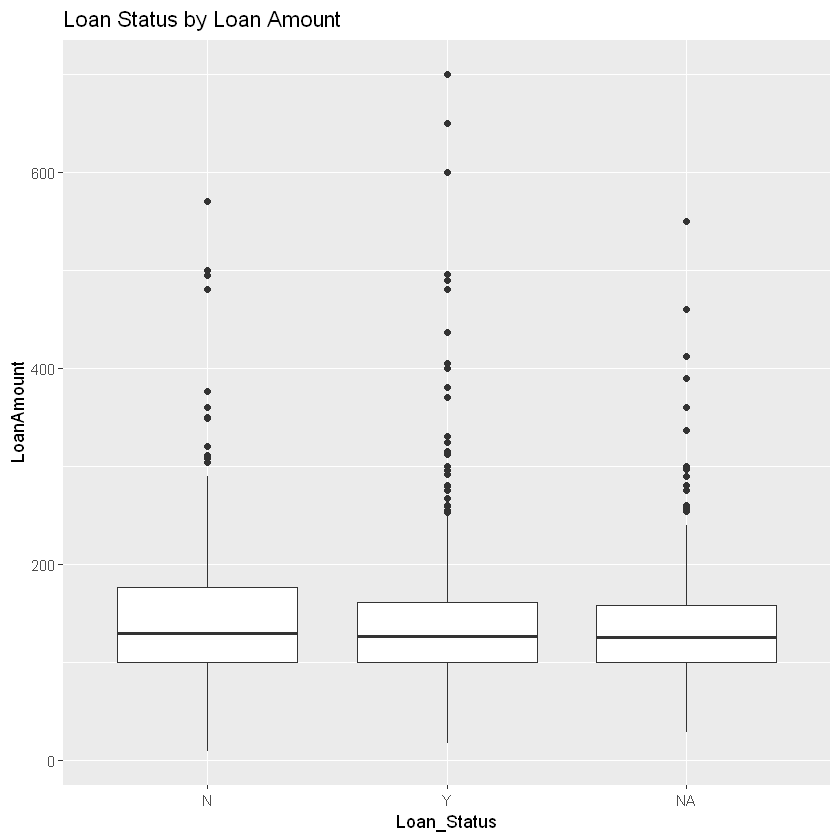

In [30]:
#this seems to make a difference
print(ggplot(dta, aes(x=Loan_Status,y=LoanAmount))+geom_boxplot()+ggtitle("Loan Status by Loan Amount"))

In [32]:
alldata<-rbind(dta[,2:12])
#pairs(alldata)
#install.packages("plyr")
library(plyr)
alldata2<-mutate(alldata,TotalIncome=ApplicantIncome+CoapplicantIncome)
alldata2$Married[is.na(alldata2$Married) & alldata2$CoapplicantIncome==0]<-"No"
alldata2$Married[is.na(alldata2$Married)]<- "Yes"


In [33]:
alldata2[is.na(alldata2$Gender) & is.na(alldata2$Dependents),]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
753,NA,No,NA,Graduate,No,3333,1250,110,360,1,Semiurban,4583


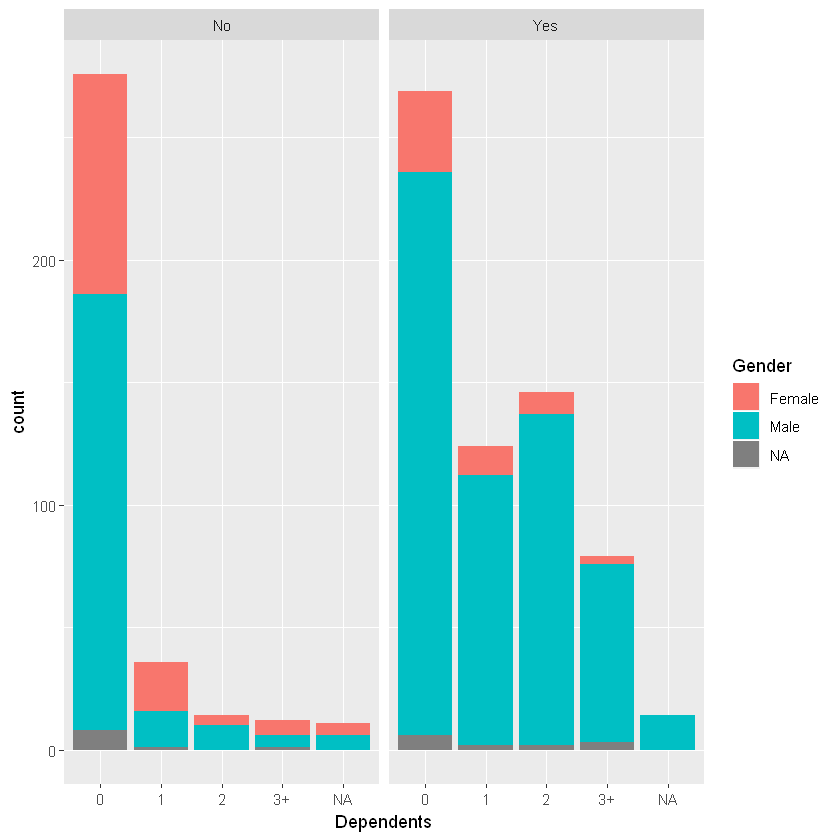

In [34]:
alldata2$Gender[is.na(alldata2$Gender) & is.na(alldata2$Dependents)] <- "Male"
print(ggplot(alldata2,aes(x=Dependents, fill=Gender)) + geom_bar() + facet_grid(.~Married))  
